Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0001 cost= 0.633196782
Epoch: 0002 cost= 0.351291754
Epoch: 0003 cost= 0.312845357
Epoch: 0004 cost= 0.294429926
Epoch: 0005 cost= 0.283545582
Epoch: 0006 cost= 0.276571931
Epoch: 0007 cost= 0.270907305
Epoch: 0008 cost= 0.266473267
Epoch: 0009 cost= 0.262723842
Epoch: 0010 cost= 0.260121308
Epoch: 0011 cost= 0.257250631
Epoch: 0012 cost= 0.254759899
Epoch: 0013 cost= 0.252974073
Epoch: 0014 cost= 0.251166666
Epoch: 0015 cost= 0.249616400
Epoch: 0016 cost= 0.248421817
Epoch: 0017 cost= 0.246785107
Epoch: 0018 cost= 0.245757285
Epoch: 0019 cost= 0.245062722
Epoch: 0020 cost= 0.243782491
Epoch: 0021 cost= 0.242638899
Epoch: 0022 cost= 0.242043084
Epoch: 0023 cost= 0.241062922
Epoch: 0024 cost= 0.240041472
Epoch: 0025 cost

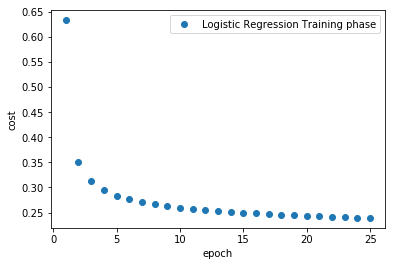

Model accuracy: 0.9273


In [1]:
# Import MINST data
#import input_data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
learning_rate = 0.001
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

# Create model

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
#activation = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
activation = tf.matmul(x, W) + b

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=activation, labels=y))

# Minimize error using cross entropy
#cross_entropy = y*tf.log(activation)
#cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy,reduction_indices=1))

#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#Plot settings
avg_set = []
epoch_set=[]

# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print ("Training phase finished")
    
    plt.plot(epoch_set,avg_set, 'o', label='Logistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Model accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

